# Import the necessary library

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [65]:
honey = pd.read_csv('honey.csv')
honey.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


# Understanding the dataset

Shape of the dataset

In [66]:
honey.shape

(626, 8)

Statistical Summary ofthe numerical column of the dataset

In [67]:
honey.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


Year column should be a datetime

but let see the datatype of the *year* column

Imformation about the dataset

In [68]:
honey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


# EDA

check for missing values

In [69]:
honey.isnull().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

The data contain no missing values

Covert year to datetime

In [70]:
honey['year'] = pd.to_datetime(honey['year'], format='%Y', errors='coerce').dt.year

honey['year'].dtype

dtype('int32')

Checking for duplicate entery

In [71]:
print(f"Is there duplicate?: {honey.duplicated().any()}")

print(f"How many duplicate are there?: {honey.duplicated().sum()}")

Is there duplicate?: False
How many duplicate are there?: 0


There is no single duplicate.

# Analysis

Time Series Analysis on the dataset

Let group the dataset by year and make some visualization

In [72]:
honey_by_year = honey.groupby('year')[['numcol','yieldpercol','totalprod','stocks','priceperlb', 'prodvalue']].sum()
honey_by_year

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
year,,,,,,
1998,2621000.0,3008,219519000.0,80565000.0,35.80,146091000.0
1999,2637000.0,2815,202387000.0,78390000.0,34.58,123657000.0
2000,2604000.0,2906,219558000.0,84956000.0,34.03,131568000.0
2001,2542000.0,2840,185748000.0,64764000.0,40.12,132282000.0
2002,2565000.0,2939,171265000.0,39177000.0,60.34,227302000.0
2003,2591000.0,2752,181372000.0,40619000.0,65.77,252079000.0
2004,2539000.0,2657,182729000.0,60981000.0,52.67,197307000.0
2005,2394000.0,2635,173969000.0,62187000.0,49.00,160793000.0
2006,2378000.0,2536,154238000.0,60235000.0,53.45,157924000.0


Let understand the correlation between the production and what it was value

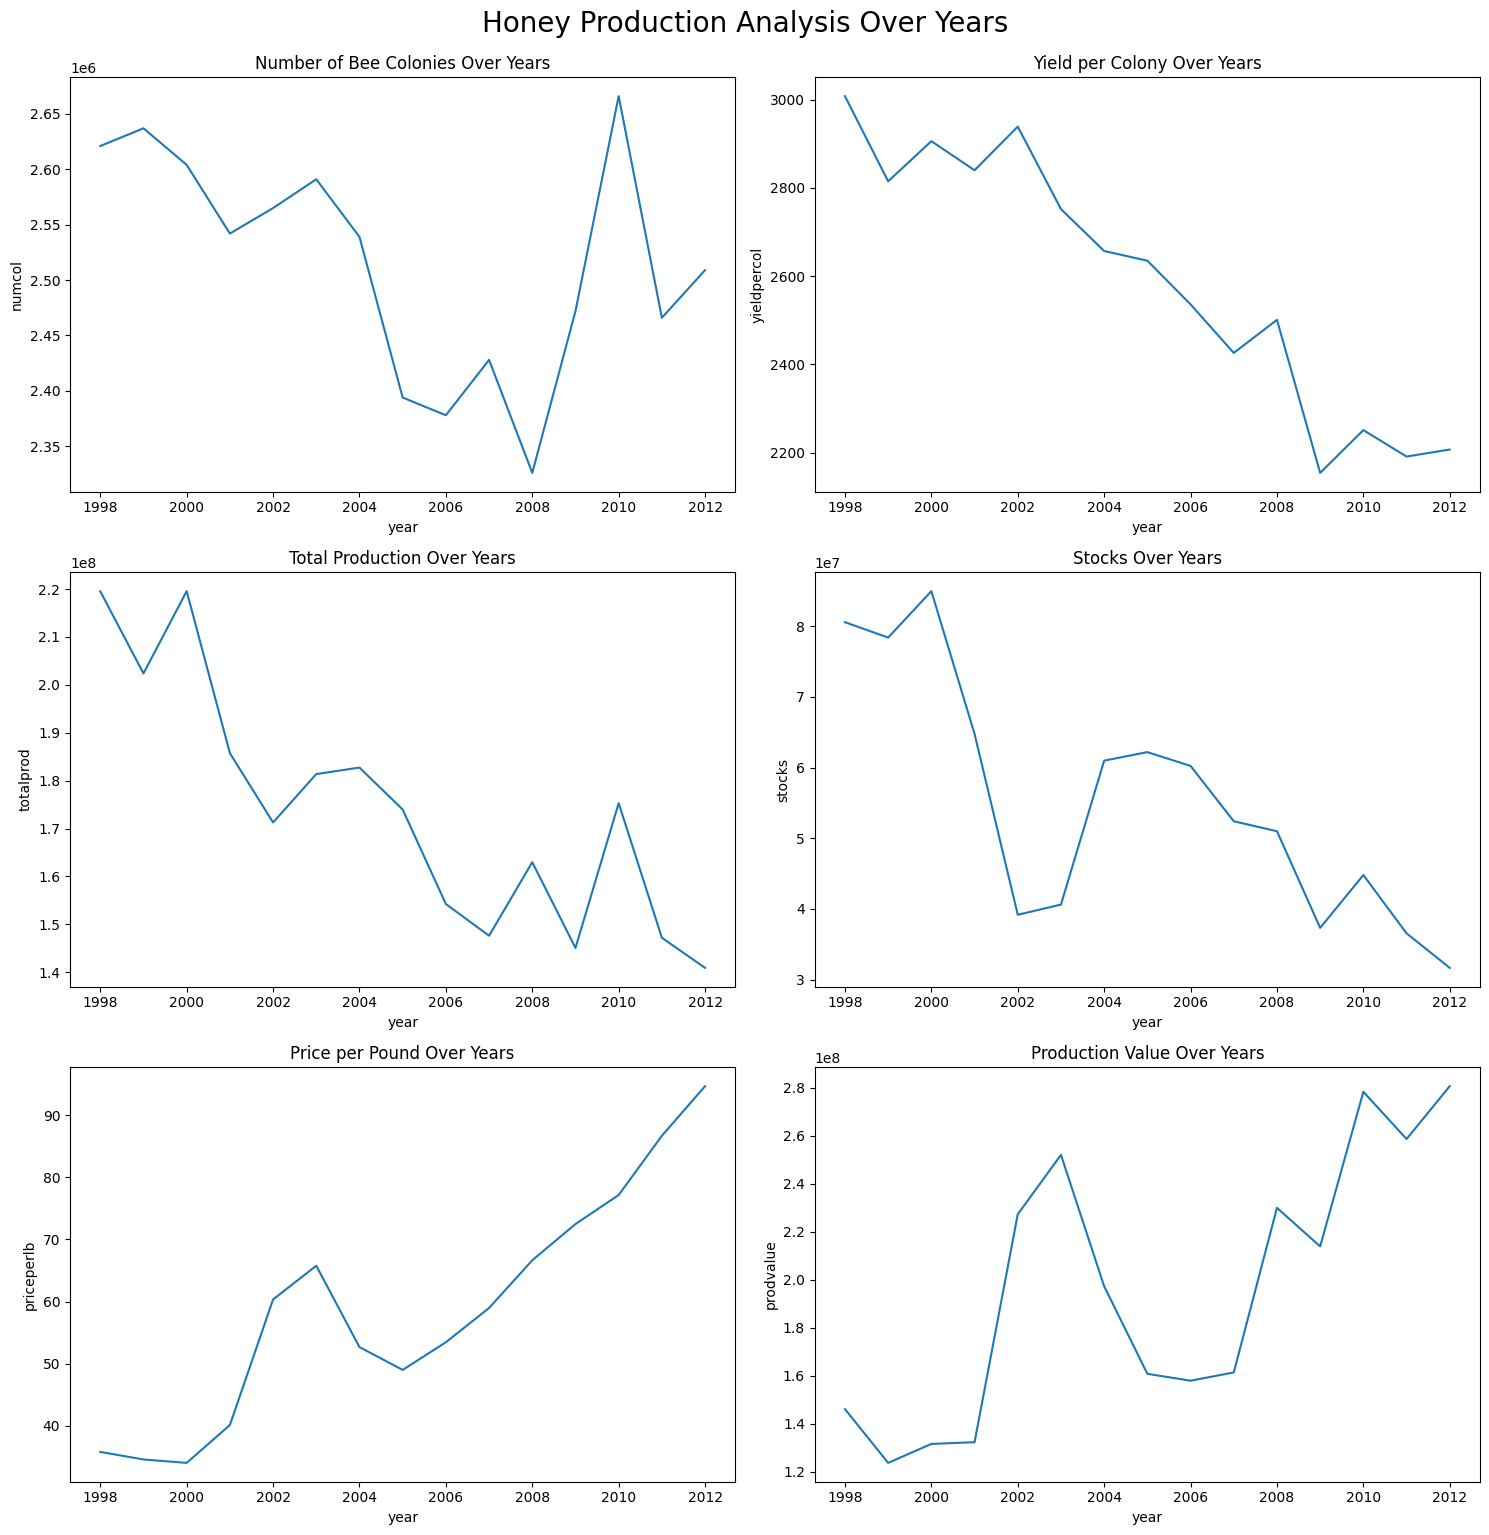

In [73]:
# Create a subplot for each column
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
sns.lineplot(x=honey_by_year.index, y=honey_by_year['numcol'], ax=axes[0, 0])
axes[0, 0].set_title('Number of Bee Colonies Over Years')
sns.lineplot(x=honey_by_year.index, y=honey_by_year['yieldpercol'], ax=axes[0, 1])
axes[0, 1].set_title('Yield per Colony Over Years')
sns.lineplot(x=honey_by_year.index, y=honey_by_year['totalprod'], ax=axes[1, 0])
axes[1, 0].set_title('Total Production Over Years')
sns.lineplot(x=honey_by_year.index, y=honey_by_year['stocks'], ax=axes[1, 1])
axes[1, 1].set_title('Stocks Over Years')
sns.lineplot(x=honey_by_year.index, y=honey_by_year['priceperlb'], ax=axes[2, 0])
axes[2, 0].set_title('Price per Pound Over Years')
sns.lineplot(x=honey_by_year.index, y=honey_by_year['prodvalue'], ax=axes[2, 1])
axes[2, 1].set_title('Production Value Over Years')
plt.tight_layout()
plt.suptitle('Honey Production Analysis Over Years', fontsize=20, y=1.02)
plt.show()

Insight from the plot
plot [0, 0]: There is general decline in the number of colonies from 1998 until 2008, when there is a spike in the number of the bees colonies

plot [0, 1]: Reduction in the nummber of colonies mean low yield which could not even be regain in 2008 despite increase in the number of the colonies.

plot [1, 0]: This lead to the drop in the honey production.

plot [1, 1]: The stock droprapidly although it rises somewhere around 2004 to 2025. However it could not be sustain for quite long.

plot [2, 0]: Two things can be attributed to the increase in the price, it might be due to inflation or most likely the scarcity of the honey

plot [2, 1] The production value falls within and rapidly increases untill somewhere around 2003 when it experience a sharp decline from 2.5e08 to 1.6e08. The value stabilizes from 2005 to 2007 before it generally rises again.

Let understand the states statisctics

In [74]:
honey_by_state = honey.groupby('state')[['numcol','yieldpercol','totalprod','stocks','priceperlb', 'prodvalue']].sum()
honey_by_state.shape

(44, 6)

In [75]:
# Maximum number of colonies in a state
max_colonies_state = honey_by_state['numcol'].idxmax()
honey_by_state.loc[max_colonies_state] # max_colonies_state

numcol           6100000.0
yieldpercol          837.0
totalprod      347535000.0
stocks          96807000.0
priceperlb            17.0
prodvalue      365390000.0
Name: CA, dtype: float64

In [76]:
# Minimum number of colonies in a state
min_colonies_state = honey_by_state['numcol'].idxmin()
honey_by_state.loc[min_colonies_state] # min_colonies_state

numcol           16000.00
yieldpercol        204.00
totalprod      1030000.00
stocks           89000.00
priceperlb           3.93
prodvalue      1338000.00
Name: SC, dtype: float64

In [77]:
# Minimum number of colonies in a state
max_prod_state = honey_by_state['totalprod'].idxmax()
honey_by_state.loc[max_prod_state]

numcol         5.555000e+06
yieldpercol    1.321000e+03
totalprod      4.750850e+08
stocks         1.328980e+08
priceperlb     1.688000e+01
prodvalue      5.456420e+08
Name: ND, dtype: float64

In [78]:
# Minimum number of colonies in a state
min_prod_state = honey_by_state['totalprod'].idxmin()
honey_by_state.loc[min_prod_state]

numcol           16000.00
yieldpercol        204.00
totalprod      1030000.00
stocks           89000.00
priceperlb           3.93
prodvalue      1338000.00
Name: SC, dtype: float64

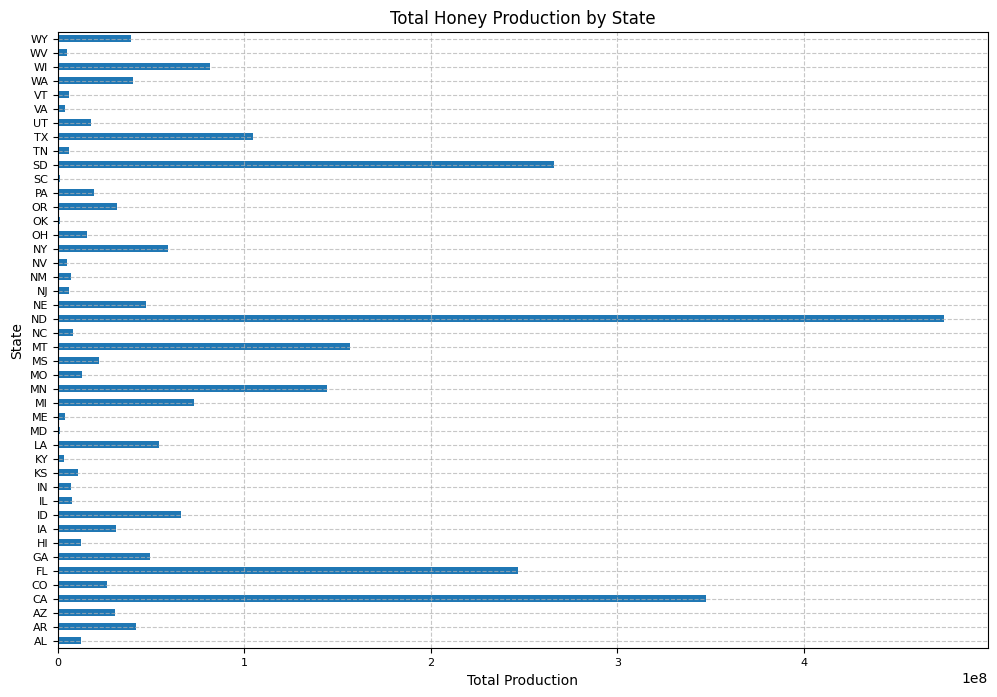

In [79]:
honey_by_state['totalprod'].plot(kind='barh', fontsize=8, figsize=(12,8))
plt.xlabel("Total Production")
plt.ylabel("State")
plt.title("Total Honey Production by State")
plt.grid(linestyle='--',alpha=0.7)
plt.show()

While California has the highest number of bee colony numbering 6100000, North Dakota has the highest be production. South Carolina has the lowest number of colonies (16000) and produce less honey.

Let sort the state by number of colonies

In [80]:
sorted_honey_by_state=honey_by_state.sort_values(by='totalprod', ascending=False)

# The highest 5 honey prodcution state
sorted_honey_by_state.head()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
state,,,,,,
ND,5555000.0,1321,475085000.0,132898000.0,16.88,545642000.0
CA,6100000.0,837,347535000.0,96807000.0,17.00,365390000.0
SD,3544000.0,1137,266141000.0,131494000.0,17.10,290651000.0
FL,2928000.0,1246,247048000.0,33144000.0,16.51,249229000.0
MT,2040000.0,1160,156562000.0,47950000.0,17.26,176903000.0


In [81]:
# The least 5 honey production state 
sorted_honey_by_state.tail()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
state,,,,,,
ME,126000.0,466,3701000.0,1445000.0,21.48,5067000.0
KY,66000.0,782,3445000.0,704000.0,31.24,7199000.0
MD,28000.0,270,1266000.0,291000.0,9.37,1833000.0
OK,27000.0,278,1207000.0,401000.0,8.74,1711000.0
SC,16000.0,204,1030000.0,89000.0,3.93,1338000.0


Let explore the correlation between the columns in the group by the state

In [82]:
honey_by_state_corr = honey_by_state.corr()
round(honey_by_state_corr,3)

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.000,0.349,0.977,0.915,-0.249,0.970
yieldpercol,0.349,1.000,0.420,0.384,0.097,0.421
totalprod,0.977,0.420,1.000,0.926,-0.249,0.998
stocks,0.915,0.384,0.926,1.000,-0.230,0.932
priceperlb,-0.249,0.097,-0.249,-0.230,1.000,-0.231
prodvalue,0.970,0.421,0.998,0.932,-0.231,1.000


Let visualize it using heatmap

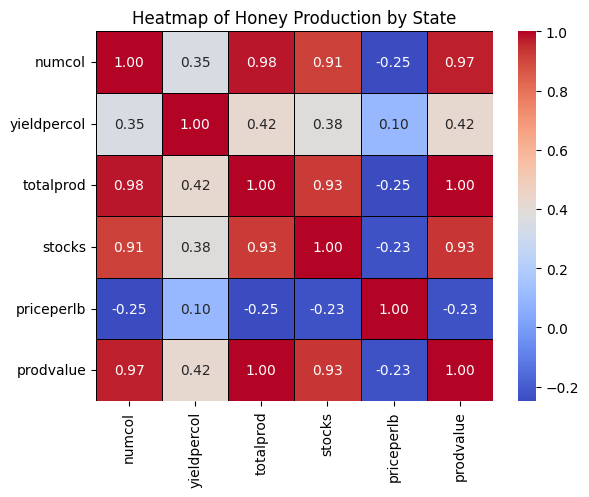

In [83]:
sns.heatmap(honey_by_state_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title("Heatmap of Honey Production by State")
plt.show()

As seen from the heatmap, there is strong correlation between the *number of column*, *total production*, *production value* and *stock* while the first are expected, however having alot of honey in stock may not necessarily depend on them. Stock might likely depend on the honey production if there is high production and low sale.